### Load the initial data, resample, concatenate and save it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# define root directory of the data
root_dir = '/home/alex/Documents/capstone-ml/forex_data/'

# define the source csv files, for machines with big ram - files2 is enough...

files17 = ['EURUSD-2017-01.csv','EURUSD-2017-02.csv','EURUSD-2017-03.csv','EURUSD-2017-04.csv',
         'EURUSD-2017-05.csv','EURUSD-2017-06.csv']

files09 = ['EURUSD-2009-05.csv','EURUSD-2009-06.csv','EURUSD-2009-07.csv','EURUSD-2009-08.csv',
         'EURUSD-2009-09.csv','EURUSD-2009-10.csv','EURUSD-2009-11.csv','EURUSD-2009-12.csv']

files = ['EURUSD-2016-01.csv','EURUSD-2016-02.csv','EURUSD-2016-03.csv','EURUSD-2016-04.csv',
         'EURUSD-2016-05.csv','EURUSD-2016-06.csv','EURUSD-2016-07.csv','EURUSD-2016-08.csv',
         'EURUSD-2016-09.csv','EURUSD-2016-10.csv','EURUSD-2016-11.csv','EURUSD-2016-12.csv']

files2 = [
         'EURUSD-2009-05.csv','EURUSD-2009-06.csv','EURUSD-2009-07.csv','EURUSD-2009-08.csv',
         'EURUSD-2009-09.csv','EURUSD-2009-10.csv','EURUSD-2009-11.csv','EURUSD-2009-12.csv',
         'EURUSD-2010-01.csv','EURUSD-2010-02.csv','EURUSD-2010-03.csv','EURUSD-2010-04.csv',
         'EURUSD-2010-05.csv','EURUSD-2010-06.csv','EURUSD-2010-07.csv','EURUSD-2010-08.csv',
         'EURUSD-2010-09.csv','EURUSD-2010-10.csv','EURUSD-2010-11.csv','EURUSD-2010-12.csv',
         'EURUSD-2011-01.csv','EURUSD-2011-02.csv','EURUSD-2011-03.csv','EURUSD-2011-04.csv',
         'EURUSD-2011-05.csv','EURUSD-2011-06.csv','EURUSD-2011-07.csv','EURUSD-2011-08.csv',
         'EURUSD-2011-09.csv','EURUSD-2011-10.csv','EURUSD-2011-11.csv','EURUSD-2011-12.csv',
         'EURUSD-2012-01.csv','EURUSD-2012-02.csv','EURUSD-2012-03.csv','EURUSD-2012-04.csv',
         'EURUSD-2012-05.csv','EURUSD-2012-06.csv','EURUSD-2012-07.csv','EURUSD-2012-08.csv',
         'EURUSD-2012-09.csv','EURUSD-2012-10.csv','EURUSD-2012-11.csv','EURUSD-2012-12.csv',
         'EURUSD-2013-01.csv','EURUSD-2013-02.csv','EURUSD-2013-03.csv','EURUSD-2013-04.csv',
         'EURUSD-2013-05.csv','EURUSD-2013-06.csv','EURUSD-2013-07.csv','EURUSD-2013-08.csv',
         'EURUSD-2013-09.csv','EURUSD-2013-10.csv','EURUSD-2013-11.csv','EURUSD-2013-12.csv',
         'EURUSD-2014-01.csv','EURUSD-2014-02.csv','EURUSD-2014-03.csv','EURUSD-2014-04.csv',
         'EURUSD-2014-05.csv','EURUSD-2014-06.csv','EURUSD-2014-07.csv','EURUSD-2014-08.csv',
         'EURUSD-2014-09.csv','EURUSD-2014-10.csv','EURUSD-2014-11.csv','EURUSD-2014-12.csv',
         'EURUSD-2015-01.csv','EURUSD-2015-02.csv','EURUSD-2015-03.csv','EURUSD-2015-04.csv',
         'EURUSD-2015-05.csv','EURUSD-2015-06.csv','EURUSD-2015-07.csv','EURUSD-2015-08.csv',
         'EURUSD-2015-09.csv','EURUSD-2015-10.csv','EURUSD-2015-11.csv','EURUSD-2015-12.csv',
         'EURUSD-2016-01.csv','EURUSD-2016-02.csv','EURUSD-2016-03.csv','EURUSD-2016-04.csv',
         'EURUSD-2016-05.csv','EURUSD-2016-06.csv','EURUSD-2016-07.csv','EURUSD-2016-08.csv',
         'EURUSD-2016-09.csv','EURUSD-2016-10.csv','EURUSD-2016-11.csv','EURUSD-2016-12.csv',
         'EURUSD-2017-01.csv','EURUSD-2017-02.csv','EURUSD-2017-03.csv','EURUSD-2017-04.csv',
         'EURUSD-2017-05.csv','EURUSD-2017-06.csv']

In [ ]:
# read the data, resample and concatenate it ...
# takes some time, maybe memory error...

ask_data = pd.DataFrame()
for file in files17:
    print("Read in "+file)
    temp = pd.read_csv(root_dir+file, usecols = [1, 2],low_memory=True, names=['Date', 'Ask'], index_col = ['Date'], dtype={'Ask':np.float32})
    temp.index = pd.to_datetime(temp.index)
    temp_ask = temp['Ask'].resample('1d').ohlc()
    del(temp)
    ask_data = pd.concat([ask_data, temp_ask])
    del(temp_ask)

In [ ]:
# save the resampled data
ask_data.to_csv("data_2017_1d.csv", index_label='Date')

### Load preprossed data, concatenate further, drop NaN values and save it as one CSV file

In [ ]:
root_dir = '/home/alex/Documents/capstone-ml/'
files = ['data_2009_1d.csv','data_2010_1d.csv','data_2011_1d.csv','data_2012_1d.csv','data_2013_1d.csv','data_2014_1d.csv',
         'data_2015_1d.csv','data_2016_1d.csv','data_2017_1d.csv']

# read the data
ask_data = pd.DataFrame()
for file in files:
    print("Read in "+file)
    temp = pd.read_csv(root_dir+file, low_memory=True, usecols=['Date', 'open', 'high', 'low', 'close'], index_col = ['Date'])
    ask_data = pd.concat([ask_data, temp])
    del(temp)

In [ ]:
# drop NaN and save to itself (inplace=True)
ask_data.dropna(inplace = True)
# save to csv file
ask_data.to_csv("data_2009-2017_1d.csv", index_label='Date')

### Load data, analyze, calculate the features and save as final CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
root_dir = '/home/alex/Documents/capstone-ml/'
file = 'data_2009-2017_1d.csv'

ask_data = pd.read_csv(root_dir+file, low_memory=True, usecols=['Date', 'open', 'high', 'low', 'close'], index_col = ['Date'])
ask_data.head()
ask_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2266 entries, 2009-05-01 to 2017-06-30
Data columns (total 4 columns):
open     2266 non-null float64
high     2266 non-null float64
low      2266 non-null float64
close    2266 non-null float64
dtypes: float64(4)
memory usage: 88.5+ KB


In [2]:
# get some basic statistics
ask_data.describe()

,open,high,low,close
count,2266.000000,2266.000000,2266.000000,2266.000000
mean,1.276043,1.281437,1.270566,1.275922
std,0.124088,0.124310,0.123756,0.124231
min,1.039050,1.041790,1.034000,1.039050
25%,1.132433,1.137758,1.127197,1.132203
50%,1.307620,1.313985,1.303600,1.307770
75%,1.367205,1.371510,1.361650,1.367173
max,1.512590,1.514430,1.503650,1.512640


In [3]:
# Kurtosis of the close data
ask_data['close'].kurtosis()

-1.1020331107407539

In [4]:
# Skewness of the close data
ask_data['close'].skew()

-0.35743209826149586

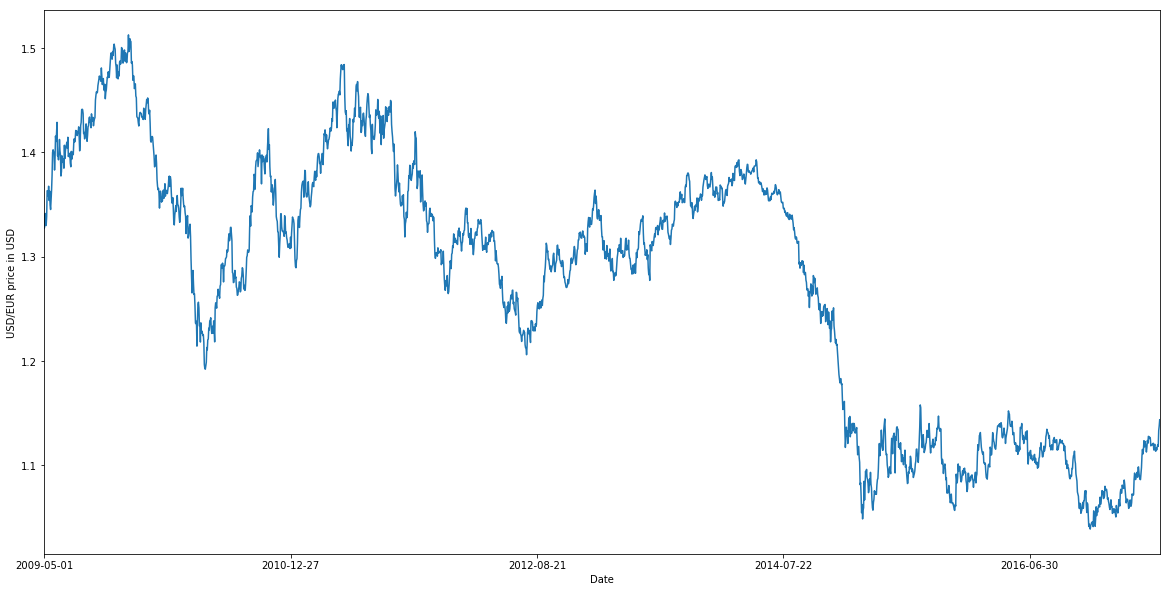

In [5]:
# some visualization
plt.figure(figsize = (20,10))
ask_data['close'].plot()
plt.xlabel("Date")
plt.ylabel("USD/EUR price in USD")

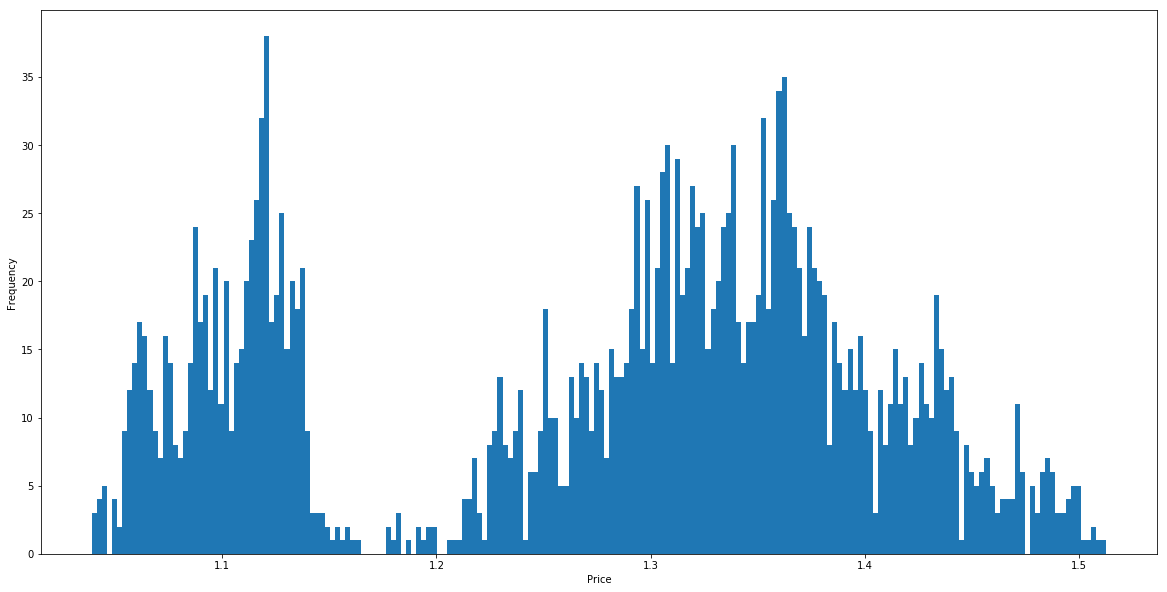

In [6]:
# Histogram
plt.figure(figsize = (20,10))
ask_data['close'].plot.hist(bins = 200)
plt.xlabel("Price")

In [8]:
# calculate data for past 4 days (found beforehand) and save to dataframe
for i in range(1,5):
    close_n = ask_data['close'].shift(i)
    ask_data[str('close-'+str(i))] = close_n.values

In [9]:
# check if successful
ask_data.head()

,open,high,low,close,close-1,close-2,close-3,close-4
Date,,,,,,,,
2009-05-01,1.32436,1.33282,1.32274,1.32729,NaN,NaN,NaN,NaN
2009-05-03,1.32731,1.32920,1.32714,1.32882,1.32729,NaN,NaN,NaN
2009-05-04,1.32878,1.34379,1.32123,1.34155,1.32882,1.32729,NaN,NaN
2009-05-05,1.34155,1.34355,1.32822,1.33037,1.34155,1.32882,1.32729,NaN
2009-05-06,1.33030,1.33746,1.32460,1.33000,1.33037,1.34155,1.32882,1.32729


In [11]:
# drop NaN and save to itself (inplace=True)
ask_data.dropna(inplace = True)
# get yesterdays close values for further features
close = np.array(ask_data['close-1'].values, dtype=np.float64)

#### use ta-lib to create the other features

In [12]:
import talib as ta
# calculate the features
SMA5 = ta.SMA(close, timeperiod = 5)
SMA8 = ta.SMA(close, timeperiod = 8)
SMA13 = ta.SMA(close, timeperiod = 13)
EMA12 = ta.EMA(close, timeperiod = 12)
EMA26 = ta.EMA(close, timeperiod = 26)

In [13]:
# add the features to the data frame
ask_data['SMA5'] = SMA5
ask_data['SMA8'] = SMA8
ask_data['SMA13'] = SMA13
ask_data['EMA12'] = EMA12
ask_data['EMA26'] = EMA26

In [14]:
# drop NaN and save to itself (inplace=True)
ask_data.dropna(inplace = True)

In [15]:
# have a look on the first 5 samples
ask_data.head()

,open,high,low,close,close-1,close-2,close-3,close-4,SMA5,SMA8,SMA13,EMA12,EMA26
Date,,,,,,,,,,,,,
2009-06-08,1.39742,1.40022,1.38050,1.39293,1.39744,1.39671,1.42886,1.41799,1.410304,1.405627,1.401994,1.399127,1.377263
2009-06-10,1.40614,1.41437,1.39151,1.39879,1.39293,1.39744,1.39671,1.42886,1.406786,1.406851,1.403118,1.398173,1.378424
2009-06-11,1.39880,1.41775,1.39430,1.41245,1.39879,1.39293,1.39744,1.39671,1.402946,1.407360,1.403035,1.398268,1.379932
2009-06-12,1.41232,1.41271,1.39354,1.40151,1.41245,1.39879,1.39293,1.39744,1.399664,1.406961,1.403795,1.400450,1.382341
2009-06-14,1.39890,1.40016,1.39664,1.39770,1.40151,1.41245,1.39879,1.39293,1.400624,1.405835,1.403840,1.400613,1.383761


In [15]:
ask_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 2009-06-08 to 2017-06-30
Data columns (total 13 columns):
open       2237 non-null float64
high       2237 non-null float64
low        2237 non-null float64
close      2237 non-null float64
close-1    2237 non-null float64
close-2    2237 non-null float64
close-3    2237 non-null float64
close-4    2237 non-null float64
SMA5       2237 non-null float64
SMA8       2237 non-null float64
SMA13      2237 non-null float64
EMA12      2237 non-null float64
EMA26      2237 non-null float64
dtypes: float64(13)
memory usage: 244.7+ KB


In [16]:
# save the dataframe as final file
ask_data.to_csv("data_complete_1d.csv", index_label='Date')